In [1]:
import sys  
sys.path.insert(0, './gore')
import gore
import gore2
import cv2
import matplotlib.pyplot as plt

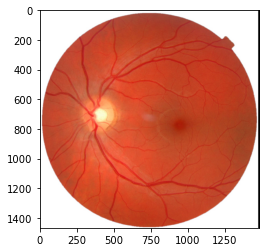

In [2]:
im2 = cv2.imread('./img/img1.jpg')
fundus2, lammax, phimax = gore2.equi(im = im2, focal_length = 24, alpha_max = gore.deg2rad(32))
fundus3 = fundus2[:,:,::-1]
plt.imshow(fundus3)

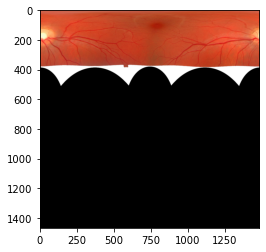

In [3]:
swapped = gore2.swap(fundus2, 0.8285317427334433, 0.8285317427334433)
swapped2 = swapped[:,:,::-1]
plt.imshow(swapped2)

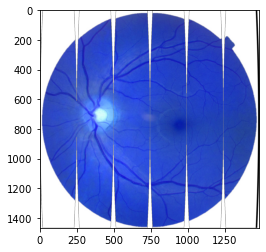

In [4]:
gored = gore2.make_equatorial(im = fundus2, num_gores = 6, phi_max = phimax, phi_min = -phimax, lam_max = lammax, lam_min = -lammax)
plt.imshow(gored)

In [5]:
h,w = swapped.shape[:2]
swapped2 = gore2.cv2.resize(swapped, (w*2, h)) 
#polar1 = gore.make_polar(gore.Image.fromarray(swapped2), num_gores = 6)
polar2 = gore2.make_polar(swapped2, num_gores = 6)
#plt.imshow(polar1)

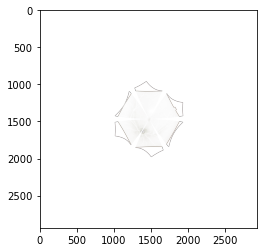

In [6]:
plt.imshow(polar2)